In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pydataset import data

from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("https://gist.githubusercontent.com/ryanorsinger/9867c96ddb56626e9aac94d8e92dabdf/raw/45f9a36a8871ac0e24317704ed0072c9dded1327/lemonade_regression.csv")

In [3]:
df.head()

,temperature,rainfall,flyers,sales
0,27.0,2.00,15,10
1,28.9,1.33,15,13
2,34.5,1.33,27,15
3,44.1,1.05,28,17
4,42.4,1.00,33,18


In [4]:
baseline = df.sales.mean()
baseline

25.323287671232876

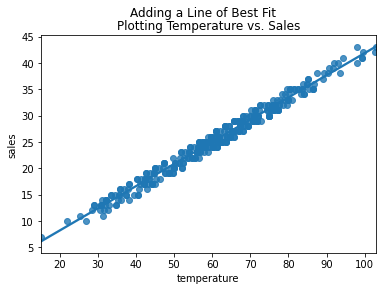

In [5]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Temperature vs. Sales")

sns.regplot(x="temperature", y="sales", data=df)
plt.show()

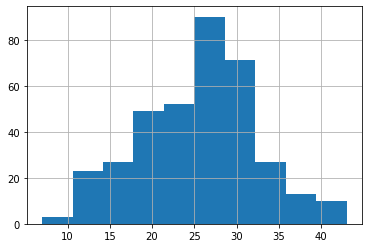

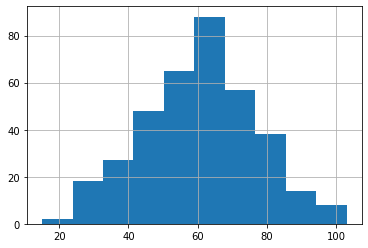

In [6]:
plt.show()
df.sales.hist()
plt.show()
df.temperature.hist()

In [7]:
model = ols('sales ~ temperature', df).fit()

In [8]:
evaluate = pd.DataFrame()

evaluate["x"] = df.temperature

evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

evaluate["yhat"] = model.predict()

evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,27.0,10,25.323288,11.112301,15.323288,1.112301
1,28.9,13,25.323288,11.912772,12.323288,-1.087228
2,34.5,15,25.323288,14.272055,10.323288,-0.727945
3,44.1,17,25.323288,18.316540,8.323288,1.316540
4,42.4,18,25.323288,17.600329,7.323288,-0.399671


In [9]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 349.977815203168


In [10]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.98


In [11]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  1.492364042585557e-309


In [12]:
f_pval < .05

True

In [13]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    return plt.gca()

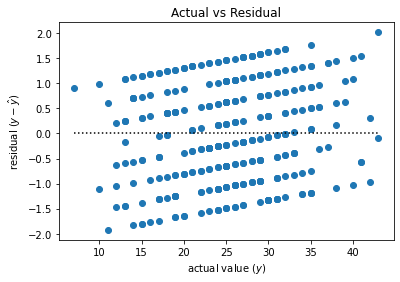

In [14]:
plot_residuals(evaluate.y, evaluate.yhat)

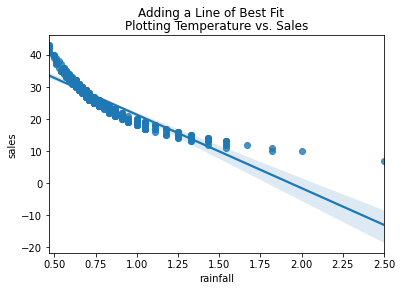

In [15]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Temperature vs. Sales")

sns.regplot(x="rainfall", y="sales", data=df)
plt.show()

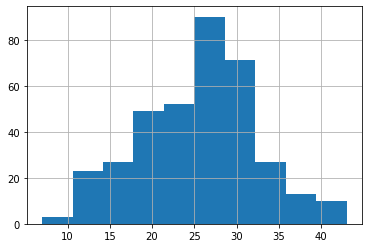

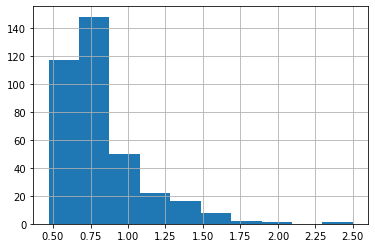

In [16]:
plt.show()
df.sales.hist()
plt.show()
df.rainfall.hist()

In [17]:
model = ols('sales ~ rainfall', df).fit()

In [18]:
evaluate = pd.DataFrame()

evaluate["x"] = df.rainfall

evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

evaluate["yhat"] = model.predict()

evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,2.00,10,25.323288,-1.599602,15.323288,-11.599602
1,1.33,13,25.323288,13.773142,12.323288,0.773142
2,1.33,15,25.323288,13.773142,10.323288,-1.226858
3,1.05,17,25.323288,20.197573,8.323288,3.197573
4,1.00,18,25.323288,21.344793,7.323288,3.344793


In [19]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 2998.2371310300655


In [20]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.827


In [21]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  3.2988846597381e-140


In [22]:
f_pval < .05

True

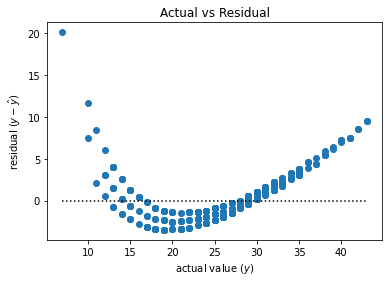

In [23]:
plot_residuals(evaluate.y, evaluate.yhat)

In [24]:
df["log_rainfall"] = np.log(df.rainfall)
df.head()

,temperature,rainfall,flyers,sales,log_rainfall
0,27.0,2.00,15,10,0.693147
1,28.9,1.33,15,13,0.285179
2,34.5,1.33,27,15,0.285179
3,44.1,1.05,28,17,0.048790
4,42.4,1.00,33,18,0.000000


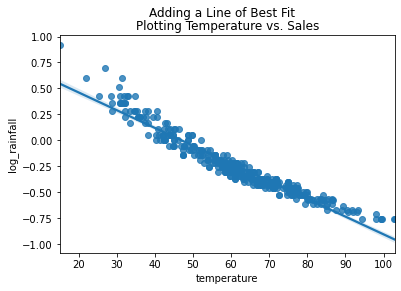

In [25]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Temperature vs. Sales")

sns.regplot(x="temperature", y="log_rainfall", data=df)
plt.show()

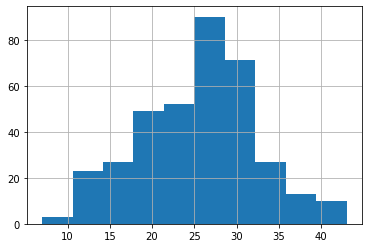

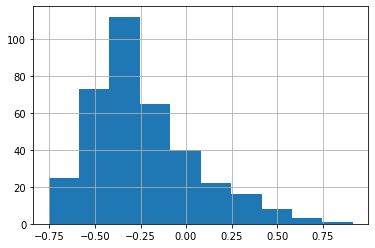

In [26]:
plt.show()
df.sales.hist()
plt.show()
df.log_rainfall.hist()

In [27]:
model = ols('sales ~ log_rainfall', df).fit()

In [28]:
evaluate = pd.DataFrame()

evaluate["x"] = df.log_rainfall

evaluate["y"] = df.sales
evaluate["baseline"] = df.sales.mean()

evaluate["yhat"] = model.predict()

evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
0,0.693147,10,25.323288,3.688573,15.323288,-6.311427
1,0.285179,13,25.323288,13.198359,12.323288,0.198359
2,0.285179,15,25.323288,13.198359,10.323288,-1.801641
3,0.048790,17,25.323288,18.708608,8.323288,1.708608


In [29]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 17297.85205479452
Model SSE 952.3253474293446


In [30]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.945


In [31]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  1.224262409779449e-230


In [32]:
f_pval < .05

True

In [ ]:
plot_residuals(evaluate.y, evaluate.yhat)

In [73]:
from pydataset import data

df = data("tips")

In [74]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [92]:
baseline = df.total_bill.mean()
baseline

19.785942622950824

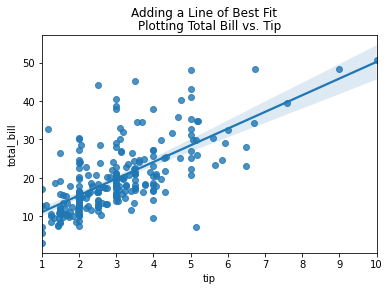

In [93]:
plt.suptitle("Adding a Line of Best Fit")
plt.title("Plotting Total Bill vs. Tip")

sns.regplot(x="tip", y="total_bill", data=df)
plt.show()

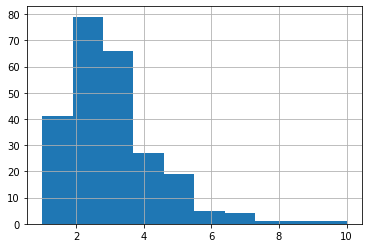

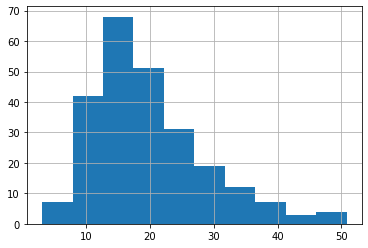

In [94]:
plt.show()
df.tip.hist()
plt.show()
df.total_bill.hist()

In [95]:
model = ols('tip ~ total_bill', df).fit()

In [96]:
evaluate = pd.DataFrame()

evaluate["x"] = df.total_bill

evaluate["y"] = df.tip
evaluate["baseline"] = df.tip.mean()

evaluate["yhat"] = model.predict()

evaluate["baseline_residual"] = evaluate.baseline - evaluate.y

evaluate["model_residual"] = evaluate.yhat - evaluate.y

evaluate.head()

,x,y,baseline,yhat,baseline_residual,model_residual
1,16.99,1.01,2.998279,2.704636,1.988279,1.694636
2,10.34,1.66,2.998279,2.006223,1.338279,0.346223
3,21.01,3.50,2.998279,3.126835,-0.501721,-0.373165
4,23.68,3.31,2.998279,3.407250,-0.311721,0.097250
5,24.59,3.61,2.998279,3.502822,-0.611721,-0.107178


In [97]:
baseline_sse = (evaluate.baseline_residual**2).sum()
model_sse = (evaluate.model_residual**2).sum()

if model_sse < baseline_sse:
    print("Our model beats the baseline")
    print("It makes sense to evaluate this model more deeply.")
else:
    print("Our baseline is better than the model.")

print("Baseline SSE", baseline_sse)
print("Model SSE", model_sse)

Our model beats the baseline
It makes sense to evaluate this model more deeply.
Baseline SSE 465.2124770491804
Model SSE 252.78874385077603


In [98]:
r2 = model.rsquared
print('R-squared = ', round(r2,3))

R-squared =  0.457


In [99]:
f_pval = model.f_pvalue
print("p-value for model significance = ", f_pval)

p-value for model significance =  6.692470646863376e-34


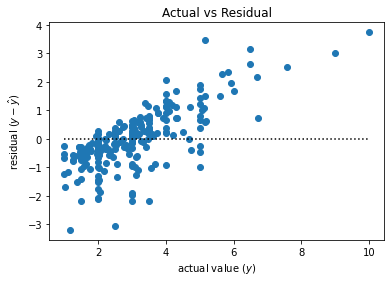

In [100]:
plot_residuals(evaluate.y, evaluate.yhat)